### INITIALIZATION:

In [1]:
# import dequired libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mutual_info_score, mean_squared_error, accuracy_score

### IMPORTING DATASET:

In [2]:
# download dataset
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data -O car-price-dataset.csv

--2023-10-01 23:50:44--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘car-price-dataset.csv’

car-price-dataset.c 100%[===================>]   1.41M  --.-KB/s    in 0.04s   

2023-10-01 23:50:44 (38.9 MB/s) - ‘car-price-dataset.csv’ saved [1475504/1475504]



In [3]:
# load data
select_cols = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
df = pd.read_csv('car-price-dataset.csv', usecols=select_cols)

In [4]:
#@ INSPECTING DATAFRAME:
print(df.shape)     

(11914, 10)


In [5]:
#@ INSPECTING DATAFRAME:
df.head(10)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,Coupe,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,Convertible,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,Coupe,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,Convertible,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,Convertible,27,18,37200


In [6]:
# Transform column names
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [7]:
# missing vales
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [8]:
# handle missing values by filling with 0
df['engine_hp'] =  df['engine_hp'].fillna(0)
df['engine_cylinders'] =  df['engine_cylinders'].fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [9]:
# Rename MSRP variable to price
df = df.rename(columns={'msrp': 'price'})
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


- Question 1
    - What is the most frequent observation (mode) for the column transmission_type?

        - AUTOMATIC
        - MANUAL
        - AUTOMATED_MANUAL
        - DIRECT_DRIVE

**Answer: AUTOMATIC** 

In [10]:
# the most frequent observation (mode) for the column transmission_type
df['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [11]:
# Alternate way to find most frequent observation
df['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

- Question 2
    - Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

    - What are the two features that have the biggest correlation in this dataset?

        - `engine_hp` and `year`
        - `engine_hp` and `engine_cylinders`
        - `highway_mpg` and `engine_cylinders`
        - `highway_mpg` and `city_mpg`

**Answer: `highway_mpg` and `city_mpg`**

In [12]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [13]:
#@ INSPECTING DATASET:
df_numeric = df.copy()
df_numeric = df_numeric.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.drop('price', axis=1)
df_numeric.head()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
0,2011,335.0,6.0,26,19
1,2011,300.0,6.0,28,19
2,2011,300.0,6.0,28,20
3,2011,230.0,6.0,28,18
4,2011,230.0,6.0,28,18


In [14]:
df_numeric.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,247.941749,5.614655,26.637485,19.733255
std,7.579740,110.507669,1.800554,8.863001,8.987798
min,1990.000000,0.000000,0.000000,12.000000,7.000000
25%,2007.000000,170.000000,4.000000,22.000000,16.000000
50%,2015.000000,225.000000,6.000000,26.000000,18.000000
75%,2016.000000,300.000000,6.000000,30.000000,22.000000
max,2017.000000,1001.000000,16.000000,354.000000,137.000000


In [15]:
#@ INSPECTING CORRELATION:
df_numeric.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


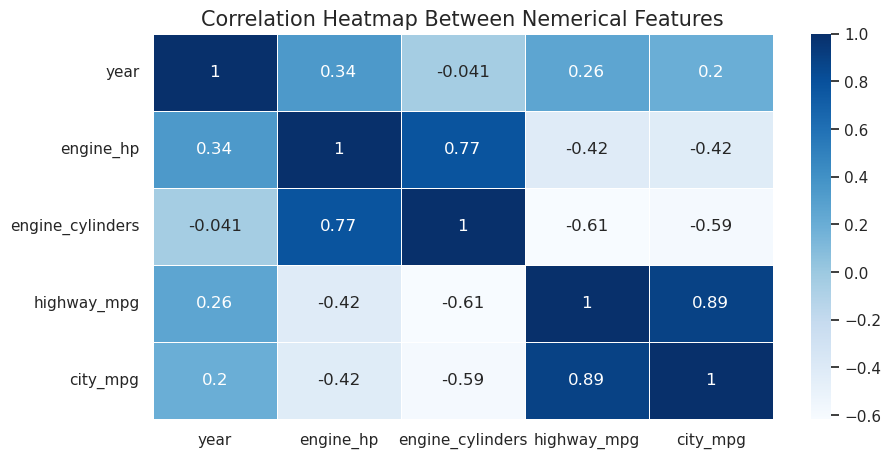

In [16]:
#@ inspecting heatmap:
plt.figure(figsize=(10, 5))
sns.heatmap(df_numeric.corr(), annot=True, linewidths=.5, cmap='Blues')
plt.title('Correlation Heatmap Between Nemerical Features', fontsize=15)
plt.show()

In [17]:
#@ INSPECTING CORRELATION:
df_numeric.corr().unstack().sort_values(ascending=False)[:20]

year              year                1.000000
engine_hp         engine_hp           1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
city_mpg          city_mpg            1.000000
                  highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
engine_hp         year                0.338714
year              engine_hp           0.338714
                  highway_mpg         0.258240
highway_mpg       year                0.258240
city_mpg          year                0.198171
year              city_mpg            0.198171
                  engine_cylinders   -0.040708
engine_cylinders  year               -0.040708
highway_mpg       engine_hp          -0.415707
engine_hp         highway_mpg        -0.415707
                  city_mpg           -0.424918
dtype: float64

 - Make `price` binary

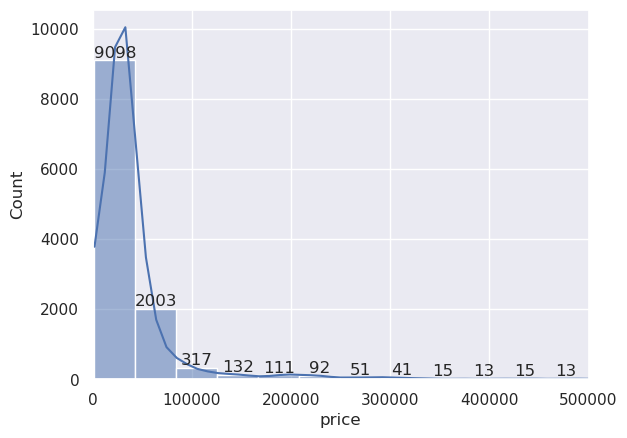

In [18]:
# distribution of price variable
plt.ticklabel_format(style='plain')
plt.xlim(0, 500000)
sns.histplot(df, x="price", bins=50, stat='count', kde=True)
# Add value annotations to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

In [19]:
# create a column above_average which is 1 if the price is above its mean value and 0 otherwise
mean_price = df['price'].mean()
df['above_average'] = df['price'].map(lambda x: 1 if x > mean_price else 0)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [20]:
#@ processing dataset
df_class = df.copy()
df_class = df_class.drop('price', axis=1)
df_class.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


- Split the data

In [21]:
#@ SPLITTING THE DATASET:
df_train_full, df_test = train_test_split(df_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [22]:
#@ PROCESSING THE DATASET:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [24]:
#@ PROCESSING THE DATASET:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [25]:
# remove above_average from splitted data
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

- Question 3

    - Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
    - Round the scores to 2 decimals using round(score, 2).
    - Which of these variables has the lowest mutual information score?

        - `make`
        - `model`
        - `transmission_type`
        - `vehicle_style`

**Answer: `transmission_type`**

### mutual information score

In [26]:
df_train_full.dtypes


make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int64
dtype: object

In [27]:
# select categorical variables
categorical_features = ['make', 'model', 'transmission_type', 'vehicle_style']

# define function to calculate mutual information score
def calculate_mi_score(series):
    return round(mutual_info_score(series, df_train_full.above_average), 2)

# apply
df_mi = df_train_full[categorical_features].apply(calculate_mi_score)
df_mi = df_mi.sort_values(ascending=False).to_frame(name= 'MI')
df_mi

,MI
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


- Question 4
    - Now let's train a logistic regression.
    - Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
    - Fit the model on the training dataset.
    -   To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    -   `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
    - Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
    - What accuracy did you get?

        - 0.60
        - 0.72
        - 0.84
        - 0.95
    
**Answer: 0.95**

### CLASSIFICATION AND ACCURACY OF MODEL:

In [28]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

In [29]:
#@ Transforming dataset
numerical_features = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
train_dict = df_train[categorical_features + numerical_features].to_dict(orient='records')
val_dict = df_val[categorical_features + numerical_features].to_dict(orient='records')
test_dict = df_test[categorical_features + numerical_features].to_dict(orient='records')

#@ Vectoring dataset
dv = DictVectorizer(sparse=False)
# dv.fit(train_dict)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

In [30]:
#@ TRAINING LOGISTIC REGRESSSION MODEL:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [31]:
#@ INITIALIZING THE MODEL PREDICTION:
y_pred = model.predict(X_val)

In [32]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [33]:
#@ INSPECTING THE ACCURACY:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.95


- Question 5
    - Let's find the least useful feature using the feature elimination technique.
    - Train a model with all these features (using the same parameters as in Q4).
    - Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
    - For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
    - Which of following feature has the smallest difference?

        - year
        - engine_hp
        - transmission_type
        - city_mpg

Note: the difference doesn't have to be positive

**Answer: year**

In [34]:
#@ INITIALIZING FEATURES:
features = categorical_features + numerical_features
features

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [35]:

#@ INSPECTING THE DIFFERENCE IN ACCURACY:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    # dv.fit(train_dict)

    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score, score, orig_score- score)

make 0.95 0.9467058329836341 0.0032941670163658676
model 0.95 0.9194292908099034 0.030570709190096523
transmission_type 0.95 0.9404112463281578 0.009588753671842198
vehicle_style 0.95 0.9320184641208561 0.017981535879143862
year 0.95 0.9471254720939991 0.0028745279060008455
engine_hp 0.95 0.9227864036928242 0.02721359630717579
engine_cylinders 0.95 0.9454469156525388 0.004553084347461156
highway_mpg 0.95 0.9467058329836341 0.0032941670163658676
city_mpg 0.95 0.9458665547629039 0.004133445237096023


- Question 6
    - For this question, we'll see how to use a linear regression model from Scikit-Learn.
    - We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
    - Fit the Ridge regression model on the training data with a solver `sag`. Set the seed to `42`.
    - This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
    - Round your RMSE scores to 3 decimal digits.
    - Which of these alphas leads to the best RMSE on the validation set?

        - 0
        - 0.01
        - 0.1
        - 1
        - 10

Note: If there are multiple options, select the smallest `alpha`.

**Answer: 0**

### RIDGE REGRESSION:

In [36]:
# dataset with price column
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
 10  above_average      11914 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1024.0+ KB


In [38]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
above_average        0
dtype: int64

In [39]:
#@ NORMALIZING THE DATA:
df['price'] = np.log1p(df['price'])
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,10.739349,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,10.612779,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,10.500977,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,10.290483,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,10.448744,0


In [40]:
#@ Splitting that data
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [41]:
#@ PREPARING THE DATASET:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [48]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [42]:
#@ PREPARING THE DATASET:
y_train = df_train.pop('price')
y_val = df_val.pop('price')
y_test = df_test.pop('price')

In [49]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,0
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,0
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,1
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,0
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,0
...,...,...,...,...,...,...,...,...,...,...
7143,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,0
7144,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21,0
7145,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17,0
7146,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19,0


In [50]:
numerical_features

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [51]:
categorical_features

['make', 'model', 'transmission_type', 'vehicle_style']

In [55]:
#@ PREPARING THE DATASET:
train_dict = df_train[categorical_features + numerical_features].to_dict(orient='records')
val_dict = df_val[categorical_features + numerical_features].to_dict(orient='records')
test_dict = df_test[categorical_features + numerical_features].to_dict(orient='records')

In [59]:
#@ VECTORIZING THE DATASET:
dv = DictVectorizer(sparse=False)
# dv.fit(train_dict)

X_train = dv.fit_transform(train_dict)
# X_train = dv.transform(train_dict)

In [60]:
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

In [61]:
#@ RIDGE REGRESSION IMPLEMENTATION:

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = np.sqrt(mean_squared_error(y_val, y_pred))

    print(f"alpha={a}, RMSE={round(score, 3)}")

/home/ranga/anaconda3/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha=0, RMSE=0.487


/home/ranga/anaconda3/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha=0.01, RMSE=0.487


/home/ranga/anaconda3/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha=0.1, RMSE=0.487


/home/ranga/anaconda3/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha=1, RMSE=0.487
alpha=10, RMSE=0.487


/home/ranga/anaconda3/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
